In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), '..')))

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n, m = 1000, 1000

# Black Scholes call

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:01<00:00, 80.82it/s]


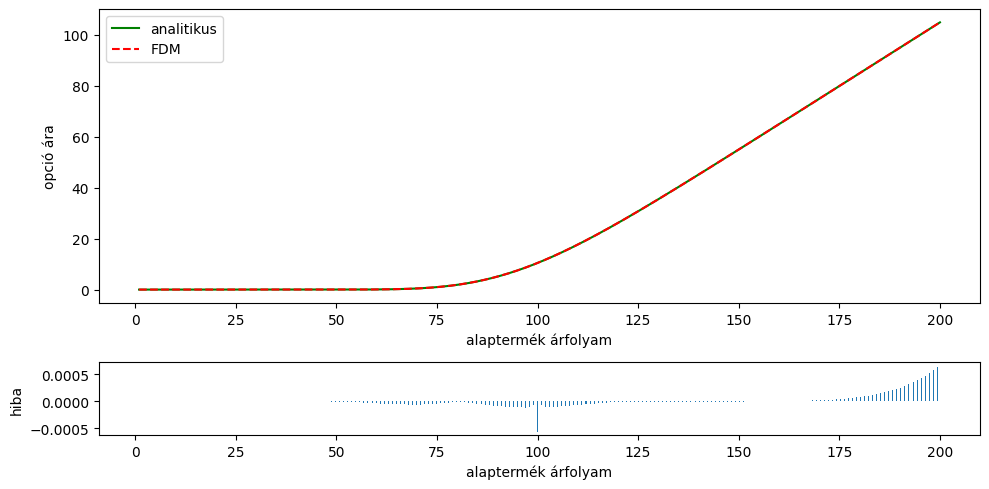

In [4]:
from pricer.analytical import BlackScholesCall
from pricer.pde_solver import BlackScholesCallPDE
from pricer.config_base import BlackScholesConfig, PDESolverConfig

S = 100.0
K = 100.0
T = 1.0
r = 0.05
sigma = 0.2

points = np.zeros((1000, 2))
points[:, 0] = np.linspace(1, 2 * S, 1000)
points[:, 1] = T

analytical_config = BlackScholesConfig(
    underlier_price=points[:, 0],
    strike=K,
    expiry=T,
    interest_rate=r,
    volatility=sigma
)

price_analytical = BlackScholesCall(analytical_config).price()

pde_config = PDESolverConfig(
    underlier_price_grid=np.linspace(0, 2 * S, n),
    time_grid=np.linspace(0, T, m),
    strike=K,
    interest_rate=r,
    volatility=sigma
)

price_pde_cls = BlackScholesCallPDE(pde_config)
price_pde_cls.solve()

price_pde = price_pde_cls.price(points)

fig, ax = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={'height_ratios': [4, 1]})

ax[0].plot(analytical_config.underlier_price, price_analytical, label="analitikus", color="green")
ax[0].plot(analytical_config.underlier_price, price_pde, label="FDM", color="red", linestyle="--")
ax[0].set_xlabel("alaptermék árfolyam")
ax[0].set_ylabel("opció ára")
ax[0].legend()

ax[1].bar(analytical_config.underlier_price, price_analytical - price_pde, width=0.05)
ax[1].set_xlabel("alaptermék árfolyam")
ax[1].set_ylabel("hiba")

plt.tight_layout()
plt.show()

# Black Scholes put

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:01<00:00, 84.19it/s]


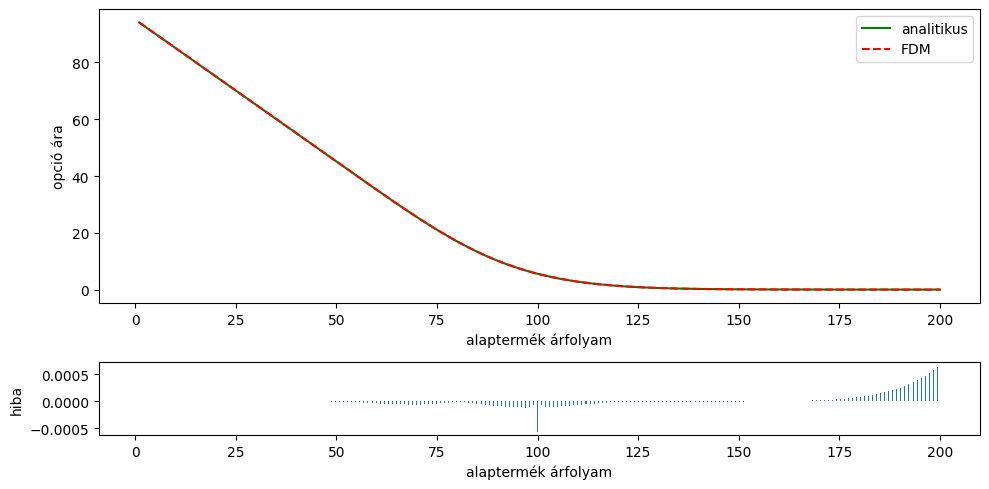

In [5]:
from pricer.analytical import BlackScholesPut
from pricer.pde_solver import BlackScholesPutPDE
from pricer.config_base import BlackScholesConfig, PDESolverConfig

S = 100.0
K = 100.0
T = 1.0
r = 0.05
sigma = 0.2

points = np.zeros((1000, 2))
points[:, 0] = np.linspace(1, 2 * S, 1000)
points[:, 1] = T

analytical_config = BlackScholesConfig(
    underlier_price=points[:, 0],
    strike=K,
    expiry=T,
    interest_rate=r,
    volatility=sigma
)

price_analytical = BlackScholesPut(analytical_config).price()

pde_config = PDESolverConfig(
    underlier_price_grid=np.linspace(0, 2 * S, n),
    time_grid=np.linspace(0, T, m),
    strike=K,
    interest_rate=r,
    volatility=sigma
)

price_pde_cls = BlackScholesPutPDE(pde_config)
price_pde_cls.solve()

price_pde = price_pde_cls.price(points)

fig, ax = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={'height_ratios': [4, 1]})

ax[0].plot(analytical_config.underlier_price, price_analytical, label="analitikus", color="green")
ax[0].plot(analytical_config.underlier_price, price_pde, label="FDM", color="red", linestyle="--")
ax[0].set_xlabel("alaptermék árfolyam")
ax[0].set_ylabel("opció ára")
ax[0].legend()

ax[1].bar(analytical_config.underlier_price, price_analytical - price_pde, width=0.05)
ax[1].set_xlabel("alaptermék árfolyam")
ax[1].set_ylabel("hiba")

plt.tight_layout()
plt.show()

# Up-and-out barrier call option

100%|███████████████████████████████████████████████████████████████████████████████| 199/199 [00:00<00:00, 369.34it/s]


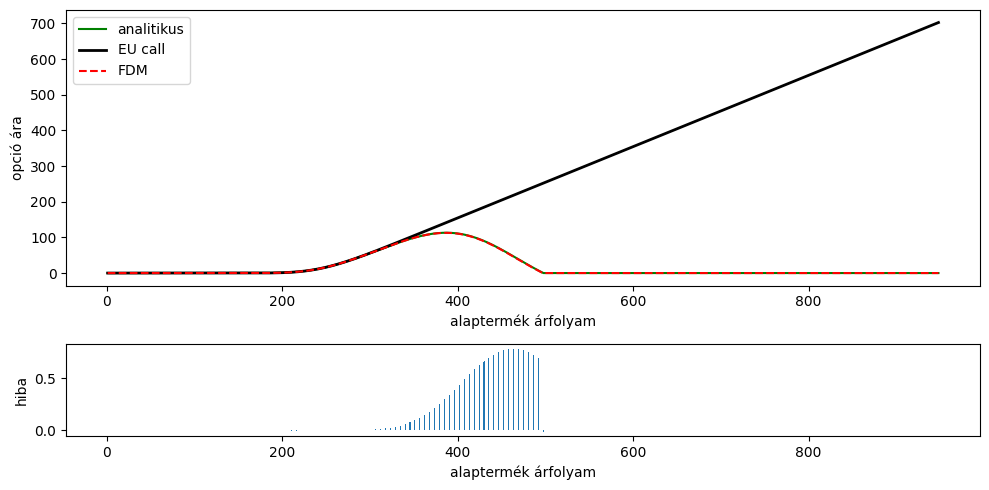

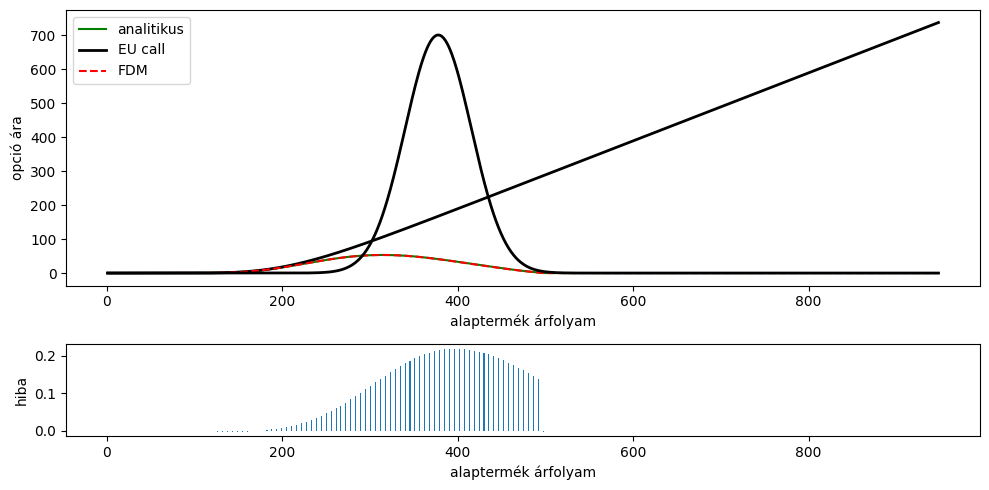

In [7]:
from pricer.analytical import BarrierUpAndOutCall, BlackScholesCall
from pricer.pde_solver import BarrierUpAndOutCallPDE
from pricer.config_base import BlackScholesConfig, PDESolverConfig

n, m = 500, 200

S = 1.8372 * 258 # 100.0
K = 258 # 100.0
T = 0.5 # 1.0
r = 0.1 # 0.05
sigma = 0.2 # 0.2
barrier = 1.9287 * K # 150.0

points = np.zeros((1000, 2))
points[:, 0] = np.linspace(1, 2 * S, 1000)
points[:, 1] = T

analytical_config = BlackScholesConfig(
    underlier_price=points[:, 0],
    strike=K,
    expiry=T,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_analytical_call = BlackScholesCall(analytical_config).price()
price_analytical = BarrierUpAndOutCall(analytical_config).price()

pde_config = PDESolverConfig(
    underlier_price_grid=np.linspace(0, 2 * S, n),
    time_grid=np.linspace(0, T, m),
    strike=K,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_pde_cls = BarrierUpAndOutCallPDE(pde_config)
price_pde_cls.solve()

price_pde = price_pde_cls.price(points)

fig, ax = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={'height_ratios': [3, 1]})

ax[0].plot(analytical_config.underlier_price, price_analytical, label="analitikus", color="green")
ax[0].plot(analytical_config.underlier_price, price_analytical_call, label="EU call", color="black", lw=2)
ax[0].plot(analytical_config.underlier_price, price_pde, label="FDM", color="red", linestyle="--")
ax[0].set_xlabel("alaptermék árfolyam")
ax[0].set_ylabel("opció ára")
ax[0].legend()

ax[1].bar(analytical_config.underlier_price, price_analytical - price_pde, width=0.2)
ax[1].set_xlabel("alaptermék árfolyam")
ax[1].set_ylabel("hiba")

plt.tight_layout()
plt.show()

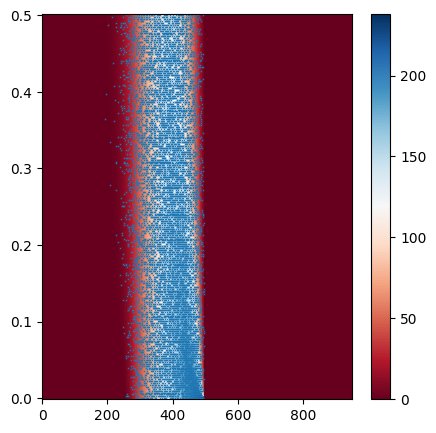

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))

z_min, z_max = price_pde_cls.grid.min(), price_pde_cls.grid.max()
c = ax.pcolormesh(price_pde_cls.x, price_pde_cls.max_t - price_pde_cls.t, price_pde_cls.grid, cmap='RdBu', vmin=z_min, vmax=z_max)
fig.colorbar(c, ax=ax)

plt.scatter(price_pde_cls.x[selections[:, 1], selections[:, 0]], price_pde_cls.max_t - price_pde_cls.t[selections[:, 1], selections[:, 0]], marker="x", s=0.1)

# plt.imshow(price_pde_cls.grid, cmap='hot', interpolation='nearest')
plt.show()

In [8]:
dist = np.maximum(price_pde_cls.grid, 0.0) / np.maximum(price_pde_cls.grid, 0.0).sum()

pairs=np.indices(dimensions=(200,500)).T # here are all of the x,y pairs 

# make n random selections from the flattened pmf without replacement
# whether you want replacement depends on your application
n=10000
inds=np.random.choice(np.arange(500 * 200),p=dist.reshape(-1),size=n,replace=False)

# inds is the set of n randomly chosen indicies into the flattened dist array...
# therefore the random x,y selections
# come from selecting the associated elements
# from the flattened pairs array
selections = pairs.reshape(-1,2)[inds]

# Up-and-out barrier put

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 130.11it/s]


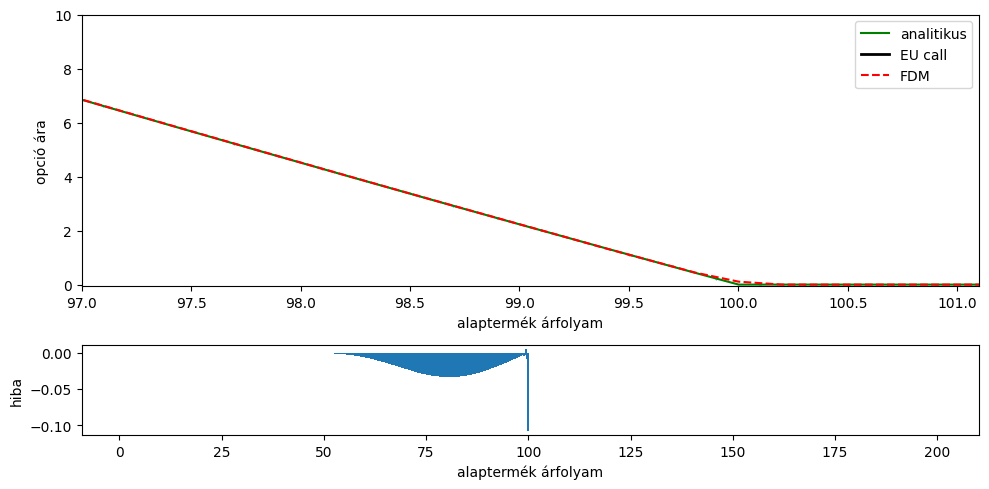

In [7]:
from pricer.analytical import BarrierUpAndOutPut, BlackScholesPut
from pricer.pde_solver import BarrierUpAndOutPutPDE
from pricer.config_base import BlackScholesConfig, PDESolverConfig

S = 100.0
K = 150.0
T = 1.0
r = 0.05
sigma = 0.2
barrier = 100.0

points = np.zeros((1000, 2))
points[:, 0] = np.linspace(1, 2 * S, 1000)
points[:, 1] = T

analytical_config = BlackScholesConfig(
    underlier_price=points[:, 0],
    strike=K,
    expiry=T,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_analytical_call = BlackScholesPut(analytical_config).price()
price_analytical = BarrierUpAndOutPut(analytical_config).price()

pde_config = PDESolverConfig(
    underlier_price_grid=np.linspace(0, 2 * S, n),
    time_grid=np.linspace(0, T, m),
    strike=K,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_pde_cls = BarrierUpAndOutPutPDE(pde_config)
price_pde_cls.solve()

price_pde = price_pde_cls.price(points)

fig, ax = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={'height_ratios': [3, 1]})

ax[0].plot(analytical_config.underlier_price, price_analytical, label="analitikus", color="green")
ax[0].plot(analytical_config.underlier_price, price_analytical_call, label="EU call", color="black", lw=2)
ax[0].plot(analytical_config.underlier_price, price_pde, label="FDM", color="red", linestyle="--")
ax[0].scatter(price_pde_cls.x[:, 0], price_pde_cls.grid[:, 0], s=0.1)
ax[0].set_xlabel("alaptermék árfolyam")
ax[0].set_ylabel("opció ára")
ax[0].legend()
ax[0].set_xlim(97, 101.1)
ax[0].set_ylim(-0.05, 10)

ax[1].bar(analytical_config.underlier_price, price_analytical - price_pde, width=0.5)
ax[1].set_xlabel("alaptermék árfolyam")
ax[1].set_ylabel("hiba")

plt.tight_layout()
plt.show()

# Up-and-in barrier call

C:\Users\Kristof\Desktop\MSc_Szakdolgozat\codebase\src\pricer\analytical.py:70: RuntimeWarning: divide by zero encountered in log
  np.log(self.underlier / self.strike)
C:\Users\Kristof\Desktop\MSc_Szakdolgozat\codebase\src\pricer\analytical.py:69: RuntimeWarning: divide by zero encountered in divide
  d1 = (
100%|███████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:01<00:00, 84.30it/s]


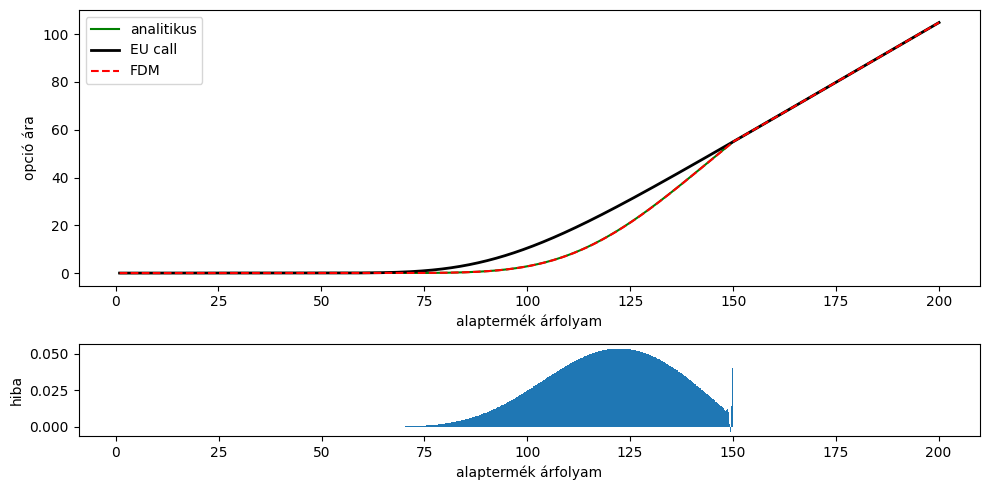

In [8]:
from pricer.analytical import BarrierUpAndInCall, BlackScholesCall
from pricer.pde_solver import BarrierUpAndInCallPDE
from pricer.config_base import BlackScholesConfig, PDESolverConfig

S = 100.0
K = 100.0
T = 1.0
r = 0.05
sigma = 0.2
barrier = 150.0

points = np.zeros((1000, 2))
points[:, 0] = np.linspace(1, 2 * S, 1000)
points[:, 1] = T

analytical_config = BlackScholesConfig(
    underlier_price=points[:, 0],
    strike=K,
    expiry=T,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_analytical_call = BlackScholesCall(analytical_config).price()
price_analytical = BarrierUpAndInCall(analytical_config).price()

pde_config = PDESolverConfig(
    underlier_price_grid=np.linspace(0, 2 * S, n),
    time_grid=np.linspace(0, T, m),
    strike=K,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_pde_cls = BarrierUpAndInCallPDE(pde_config)
price_pde_cls.solve()

points = np.zeros((1000, 2))
points[:, 0] = analytical_config.underlier_price
points[:, 1] = 1

price_pde = price_pde_cls.price(points)

fig, ax = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={'height_ratios': [3, 1]})

ax[0].plot(analytical_config.underlier_price, price_analytical, label="analitikus", color="green")
ax[0].plot(analytical_config.underlier_price, price_analytical_call, label="EU call", color="black", lw=2)
ax[0].plot(analytical_config.underlier_price, price_pde, label="FDM", color="red", linestyle="--")
ax[0].set_xlabel("alaptermék árfolyam")
ax[0].set_ylabel("opció ára")
ax[0].legend()

ax[1].bar(analytical_config.underlier_price, price_analytical - price_pde, width=0.2)
ax[1].set_xlabel("alaptermék árfolyam")
ax[1].set_ylabel("hiba")

plt.tight_layout()
plt.show()

# Up-and-in barrier put

C:\Users\Kristof\Desktop\MSc_Szakdolgozat\codebase\src\pricer\analytical.py:120: RuntimeWarning: divide by zero encountered in log
  np.log(self.underlier / self.strike)
C:\Users\Kristof\Desktop\MSc_Szakdolgozat\codebase\src\pricer\analytical.py:119: RuntimeWarning: divide by zero encountered in divide
  d1 = (
100%|██████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 142.15it/s]


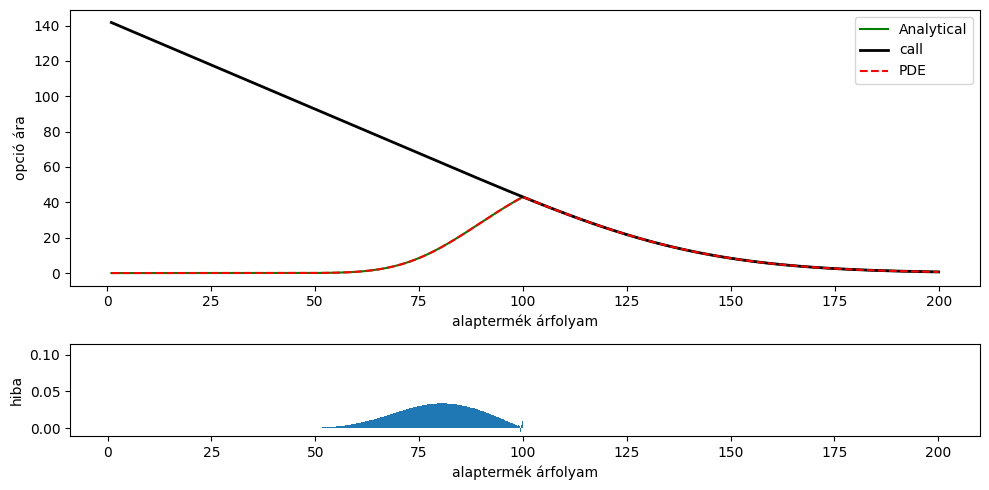

In [9]:
from pricer.analytical import BarrierUpAndInPut, BlackScholesPut
from pricer.pde_solver import BarrierUpAndInPutPDE
from pricer.config_base import BlackScholesConfig, PDESolverConfig

S = 100.0
K = 150.0
T = 1.0
r = 0.05
sigma = 0.2
barrier = 100.0

points = np.zeros((1000, 2))
points[:, 0] = np.linspace(1, 2 * S, 1000)
points[:, 1] = T

analytical_config = BlackScholesConfig(
    underlier_price=points[:, 0],
    strike=K,
    expiry=T,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_analytical_call = BlackScholesPut(analytical_config).price()
price_analytical = BarrierUpAndInPut(analytical_config).price()

pde_config = PDESolverConfig(
    underlier_price_grid=np.linspace(0, 2 * S, n),
    time_grid=np.linspace(0, T, m),
    strike=K,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_pde_cls = BarrierUpAndInPutPDE(pde_config)
price_pde_cls.solve()

points = np.zeros((1000, 2))
points[:, 0] = analytical_config.underlier_price
points[:, 1] = 1

price_pde = price_pde_cls.price(points)

fig, ax = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={'height_ratios': [3, 1]})

ax[0].plot(analytical_config.underlier_price, price_analytical, label="Analytical", color="green")
ax[0].plot(analytical_config.underlier_price, price_analytical_call, label="call", color="black", lw=2)
ax[0].plot(analytical_config.underlier_price, price_pde, label="PDE", color="red", linestyle="--")
ax[0].set_xlabel("alaptermék árfolyam")
ax[0].set_ylabel("opció ára")
ax[0].legend()

ax[1].bar(analytical_config.underlier_price, price_analytical - price_pde, width=0.2)
ax[1].set_xlabel("alaptermék árfolyam")
ax[1].set_ylabel("hiba")

plt.tight_layout()
plt.show()

# Down-and-out barrier call

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 130.18it/s]


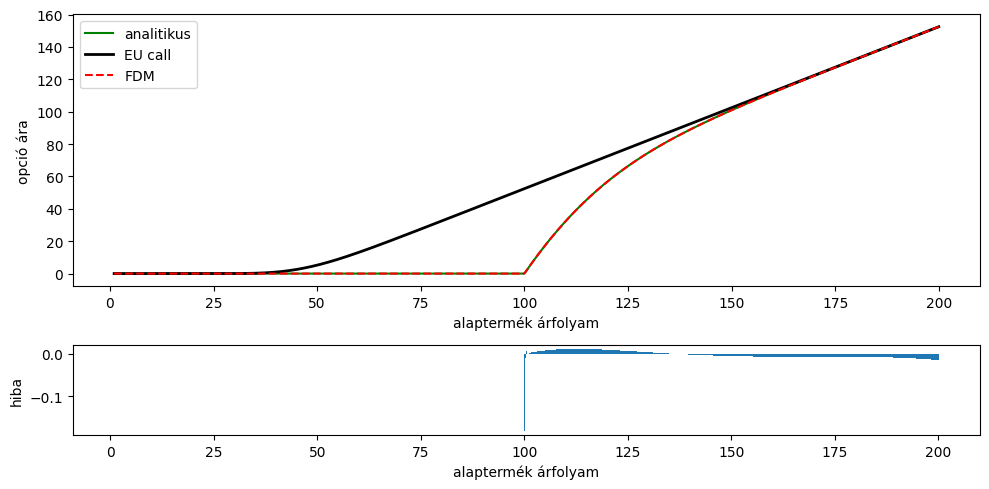

In [10]:
from pricer.analytical import BarrierDownAndOutCall, BlackScholesCall
from pricer.pde_solver import BarrierDownAndOutCallPDE
from pricer.config_base import BlackScholesConfig, PDESolverConfig

S = 100.0
K = 50.0
T = 1.0
r = 0.05
sigma = 0.2
barrier = 100.0

points = np.zeros((1000, 2))
points[:, 0] = np.linspace(1, 2 * S, 1000)
points[:, 1] = T

analytical_config = BlackScholesConfig(
    underlier_price=points[:, 0],
    strike=K,
    expiry=T,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_analytical_call = BlackScholesCall(analytical_config).price()
price_analytical = BarrierDownAndOutCall(analytical_config).price()

pde_config = PDESolverConfig(
    underlier_price_grid=np.linspace(0, 2 * S, n),
    time_grid=np.linspace(0, T, m),
    strike=K,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_pde_cls = BarrierDownAndOutCallPDE(pde_config)
price_pde_cls.solve()

points = np.zeros((1000, 2))
points[:, 0] = analytical_config.underlier_price
points[:, 1] = 1

price_pde = price_pde_cls.price(points)

fig, ax = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={'height_ratios': [3, 1]})

ax[0].plot(analytical_config.underlier_price, price_analytical, label="analitikus", color="green")
ax[0].plot(analytical_config.underlier_price, price_analytical_call, label="EU call", color="black", lw=2)
ax[0].plot(analytical_config.underlier_price, price_pde, label="FDM", color="red", linestyle="--")
ax[0].set_xlabel("alaptermék árfolyam")
ax[0].set_ylabel("opció ára")
ax[0].legend()

ax[1].bar(analytical_config.underlier_price, price_analytical - price_pde, width=0.2)
ax[1].set_xlabel("alaptermék árfolyam")
ax[1].set_ylabel("hiba")

plt.tight_layout()
plt.show()

# Down-and-out barrier put

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 110.84it/s]


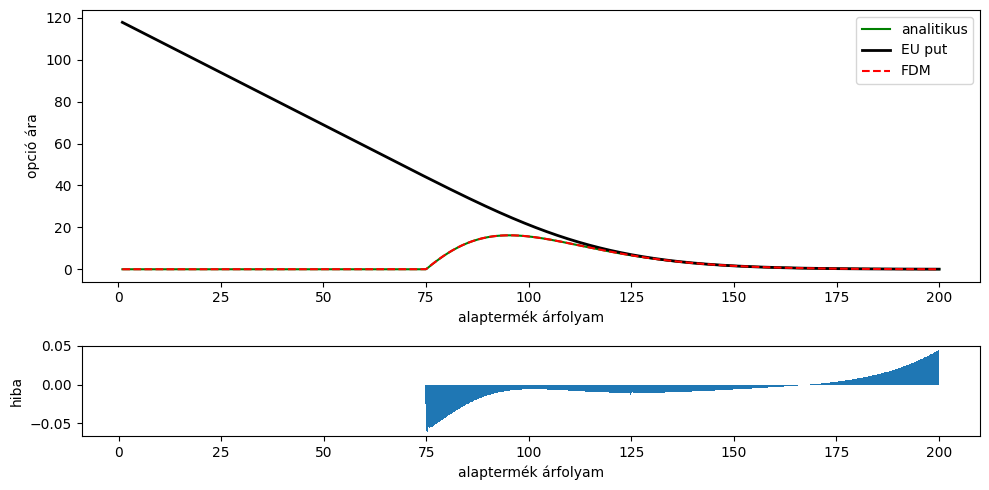

In [11]:
from pricer.analytical import BarrierDownAndOutPut, BlackScholesPut
from pricer.pde_solver import BarrierDownAndOutPutPDE
from pricer.config_base import BlackScholesConfig, PDESolverConfig

S = 100.0
K = 125.0
T = 1.0
r = 0.05
sigma = 0.2
barrier = 75.0

points = np.zeros((1000, 2))
points[:, 0] = np.linspace(1, 2 * S, 1000)
points[:, 1] = T

analytical_config = BlackScholesConfig(
    underlier_price=points[:, 0],
    strike=K,
    expiry=T,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_analytical_call = BlackScholesPut(analytical_config).price()
price_analytical = BarrierDownAndOutPut(analytical_config).price()

pde_config = PDESolverConfig(
    underlier_price_grid=np.linspace(0, 2 * S, n),
    time_grid=np.linspace(0, T, m),
    strike=K,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_pde_cls = BarrierDownAndOutPutPDE(pde_config)
price_pde_cls.solve()

points = np.zeros((1000, 2))
points[:, 0] = analytical_config.underlier_price
points[:, 1] = 1

price_pde = price_pde_cls.price(points)

fig, ax = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={'height_ratios': [3, 1]})

ax[0].plot(analytical_config.underlier_price, price_analytical, label="analitikus", color="green")
ax[0].plot(analytical_config.underlier_price, price_analytical_call, label="EU put", color="black", lw=2)
ax[0].plot(analytical_config.underlier_price, price_pde, label="FDM", color="red", linestyle="--")
ax[0].set_xlabel("alaptermék árfolyam")
ax[0].set_ylabel("opció ára")
ax[0].legend()

ax[1].bar(analytical_config.underlier_price, price_analytical - price_pde, width=0.2)
ax[1].set_xlabel("alaptermék árfolyam")
ax[1].set_ylabel("hiba")

plt.tight_layout()
plt.show()

# Down-and-in barrier call

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 137.83it/s]


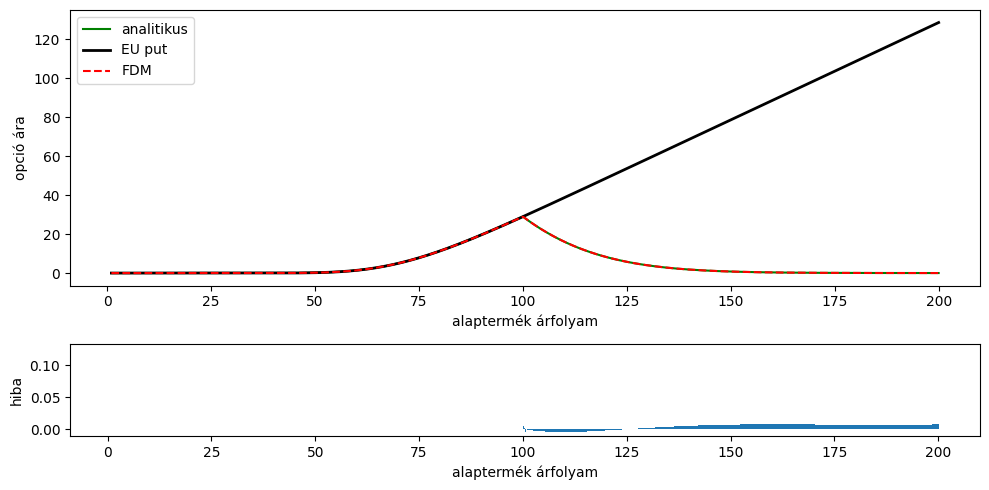

In [12]:
from pricer.analytical import BarrierDownAndInCall, BlackScholesCall
from pricer.pde_solver import BarrierDownAndInCallPDE
from pricer.config_base import BlackScholesConfig, PDESolverConfig

S = 100.0
K = 75.0
T = 1.0
r = 0.05
sigma = 0.2
barrier = 100.0

points = np.zeros((1000, 2))
points[:, 0] = np.linspace(1, 2 * S, 1000)
points[:, 1] = T

analytical_config = BlackScholesConfig(
    underlier_price=points[:, 0],
    strike=K,
    expiry=T,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_analytical_call = BlackScholesCall(analytical_config).price()
price_analytical = BarrierDownAndInCall(analytical_config).price()

pde_config = PDESolverConfig(
    underlier_price_grid=np.linspace(0, 2 * S, n),
    time_grid=np.linspace(0, T, m),
    strike=K,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_pde_cls = BarrierDownAndInCallPDE(pde_config)
price_pde_cls.solve()

points = np.zeros((1000, 2))
points[:, 0] = analytical_config.underlier_price
points[:, 1] = 1

price_pde = price_pde_cls.price(points)

fig, ax = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={'height_ratios': [3, 1]})

ax[0].plot(analytical_config.underlier_price, price_analytical, label="analitikus", color="green")
ax[0].plot(analytical_config.underlier_price, price_analytical_call, label="EU put", color="black", lw=2)
ax[0].plot(analytical_config.underlier_price, price_pde, label="FDM", color="red", linestyle="--")
ax[0].set_xlabel("alaptermék árfolyam")
ax[0].set_ylabel("opció ára")
ax[0].legend()

ax[1].bar(analytical_config.underlier_price, price_analytical - price_pde, width=0.2)
ax[1].set_xlabel("alaptermék árfolyam")
ax[1].set_ylabel("hiba")

plt.tight_layout()
plt.show()

# Down-and-in barrier put

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:01<00:00, 97.44it/s]


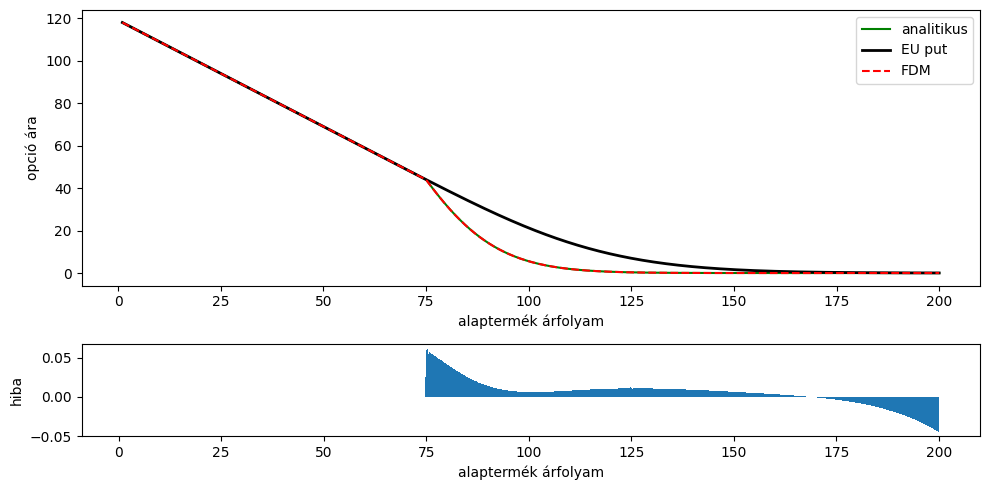

In [13]:
from pricer.analytical import BarrierDownAndInPut, BlackScholesPut
from pricer.pde_solver import BarrierDownAndInPutPDE
from pricer.config_base import BlackScholesConfig, PDESolverConfig

S = 100.0
K = 125.0
T = 1.0
r = 0.05
sigma = 0.2
barrier = 75.0

points = np.zeros((1000, 2))
points[:, 0] = np.linspace(1, 2 * S, 1000)
points[:, 1] = T

analytical_config = BlackScholesConfig(
    underlier_price=points[:, 0],
    strike=K,
    expiry=T,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_analytical_call = BlackScholesPut(analytical_config).price()
price_analytical = BarrierDownAndInPut(analytical_config).price()

pde_config = PDESolverConfig(
    underlier_price_grid=np.linspace(0, 2 * S, n),
    time_grid=np.linspace(0, T, m),
    strike=K,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_pde_cls = BarrierDownAndInPutPDE(pde_config)
price_pde_cls.solve()

points = np.zeros((1000, 2))
points[:, 0] = analytical_config.underlier_price
points[:, 1] = 1

price_pde = price_pde_cls.price(points)

fig, ax = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={'height_ratios': [3, 1]})

ax[0].plot(analytical_config.underlier_price, price_analytical, label="analitikus", color="green")
ax[0].plot(analytical_config.underlier_price, price_analytical_call, label="EU put", color="black", lw=2)
ax[0].plot(analytical_config.underlier_price, price_pde, label="FDM", color="red", linestyle="--")
ax[0].set_xlabel("alaptermék árfolyam")
ax[0].set_ylabel("opció ára")
ax[0].legend()

ax[1].bar(analytical_config.underlier_price, price_analytical - price_pde, width=0.2)
ax[1].set_xlabel("alaptermék árfolyam")
ax[1].set_ylabel("hiba")

plt.tight_layout()
plt.show()